<a href="https://colab.research.google.com/github/Mariappan07/Outliers-and-Missing-values/blob/main/duplicates%2Ccutoff%2Coutliers%2Cclipping%2Cmissing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/0.MKCE/Datasets/black_friday_train.csv")

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
data.shape

(550068, 12)

In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [ ]:
data.drop_duplicates()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
s=data.drop(['Product_ID'],axis=1)
s

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
x=s.drop_duplicates(['User_ID'])

In [ ]:
x.shape

(5891, 11)

In [ ]:
x

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,M,46-50,7,B,2,1,1,8.0,17.0,19215
9,1000005,M,26-35,20,A,1,1,8,NaN,NaN,7871
...,...,...,...,...,...,...,...,...,...,...,...
185450,1004588,F,26-35,4,C,0,0,5,8.0,NaN,8707
187076,1004871,M,18-25,12,C,2,0,1,2.0,9.0,15389
221494,1004113,M,36-45,17,C,3,0,5,NaN,NaN,5183
229480,1005391,M,26-35,7,A,0,0,1,NaN,NaN,15831


In [ ]:
data.shape

(550068, 12)

In [ ]:
s.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

In [ ]:
q1 = x.Purchase.quantile(.25)
q2 = x.Purchase.quantile(.50)
q3 = x.Purchase.quantile(.75)
print(q1)
print(q2)
print(q3)

6125.0
8671.0
14374.0


In [ ]:
#inter quantile range
iqr = q3-q1


In [ ]:
lower_cutoff = q1-1.5*iqr
upper_cutoff = q3+1.5*iqr
print(lower_cutoff)
print(upper_cutoff)

-6248.5
26747.5


In [ ]:
p0 = x.Purchase.min()
p100 = x.Purchase.max()

In [ ]:
#if p0 
print("p0 =", p0, 
      "p100 = ", p100,
      "lc = ", lower_cutoff ,
      "uc = ", upper_cutoff)

p0 = 189 p100 =  23958 lc =  -6248.5 uc =  26747.5


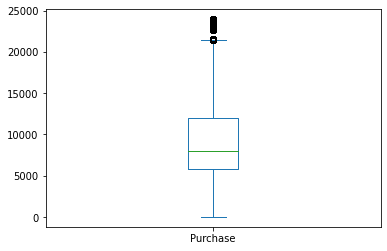

In [ ]:
data.Purchase.plot(kind='box')

{'boxes': [<matplotlib.lines.Line2D at 0x7f7cffef73d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7cffefc410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7cffe83450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7cffefced0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7cffef7950>,
  <matplotlib.lines.Line2D at 0x7f7cffef7e90>]}

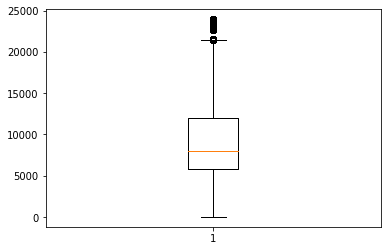

In [ ]:
plt.boxplot(data['Purchase'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


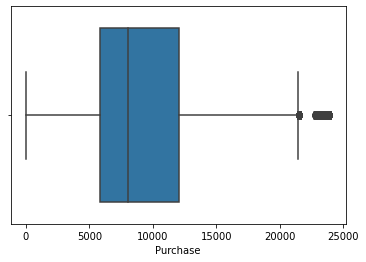

In [ ]:
sns.boxplot(data['Purchase'])

In [ ]:
# clipping all the values grater than the upper cutoff 
x.Purchase.clip(upper = upper_cutoff)

0          8370
4          7969
5         15227
6         19215
9          7871
          ...  
185450     8707
187076    15389
221494     5183
229480    15831
243533     9888
Name: Purchase, Length: 5891, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f7cfd1f9690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7cfd1fe750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7cfd185790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7cfd185250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7cfd1f9c90>,
  <matplotlib.lines.Line2D at 0x7f7cfd1fe210>]}

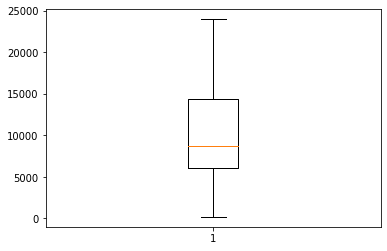

In [ ]:
plt.boxplot(x["Purchase"])

In [ ]:
x.shape

(5891, 11)

In [ ]:
# handling missing values
x.isna().sum()

User_ID                          0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1794
Product_Category_3            3977
Purchase                         0
dtype: int64

In [ ]:
#arranging the missing values
x.isna().sum().sort_values(ascending=False)

Product_Category_3            3977
Product_Category_2            1794
User_ID                          0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Purchase                         0
dtype: int64

In [ ]:
#percentage of missing bvalues
x.isna().sum()/x.shape[0]

User_ID                       0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.304532
Product_Category_3            0.675098
Purchase                      0.000000
dtype: float64

missing value treatment
 1. drop the variable]
 2. droping the observation
 3. missing value imputation

In [ ]:
x.dropna(axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
x.isna().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

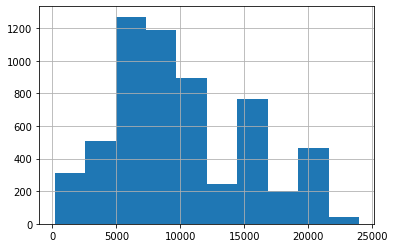

In [ ]:
#univariate analysis
x.Purchase.hist()
plt.show()

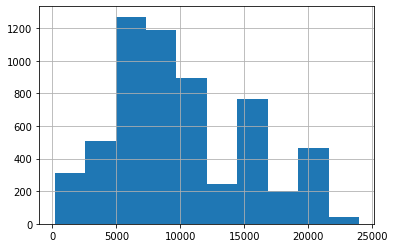

In [ ]:
plt.hist(x['Purchase'])
plt.grid()


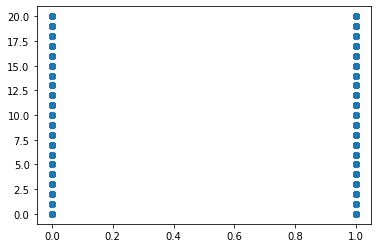

In [ ]:
plt.scatter(data['Marital_Status'],data['Occupation'])

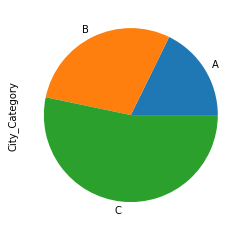

In [ ]:
x.groupby('City_Category').City_Category.count().plot(kind='pie')

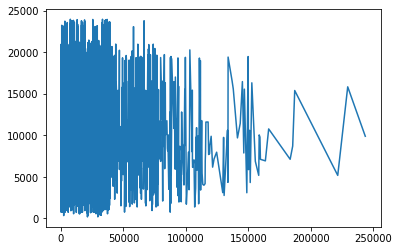

In [ ]:
x.Purchase.plot()

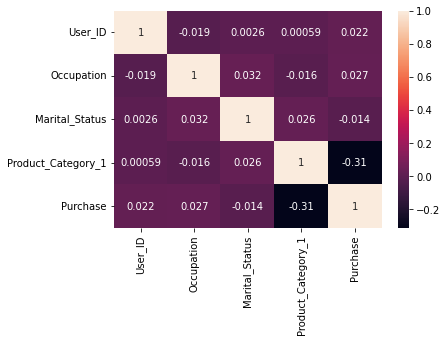

In [ ]:
sns.heatmap(x.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()